# WELCOME!

Welcome to "***Fraud Detection Project***".

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, we will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

We will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, we will have the opportunity to deploy our model by ***Streamlit API***.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are ‘Time’ and ‘Amount’.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, we need to analyze and recognize our data well in order to draw our roadmap and choose the correct arguments we will use. Accordingly, we can examine the frequency distributions of variables. We can observe variable correlations and want to explore multicollinearity. We can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, we can move on to the model building stage by doing the basic data pre-processing we are familiar with. 

We will start with Logistic Regression and evaluate model performance. We will apply the SMOTE technique used to increase the sample for unbalanced data. Next, we will rebuild our Logistic Regression model with SMOTE applied data to observe its effect.

Then, we will use three different algorithms in the model building phase.

In the final step, we will deploy our model using ***Streamlit API***. 

**Optional**: We can Dockerize our project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


# 1. Exploratory Data Analysis & Data Cleaning

## Import Modules, Load Data & Data Review

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
import cufflinks as cf

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# data = pd.read_csv("creditcard.csv")
# df = data.copy()

## Exploratory Data Analysis

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Class Analysis against other Features

## Distribution of 1,0 in Class

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


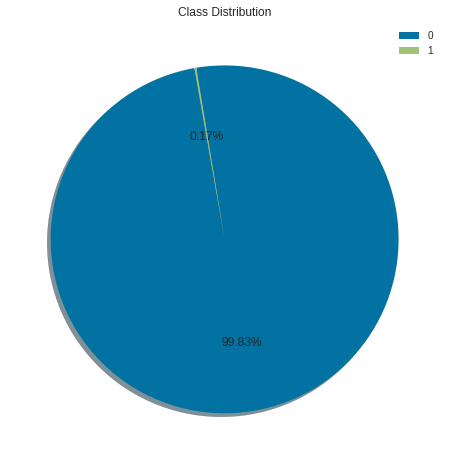

In [155]:
# The classes are heavily skewed we need to solve this issue later.
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(df['Class'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

In [11]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

### Data is highly imbalanced

In [12]:
#legit
df[df.Class == 0].Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
#fraud
df[df.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Corr of other features with Class

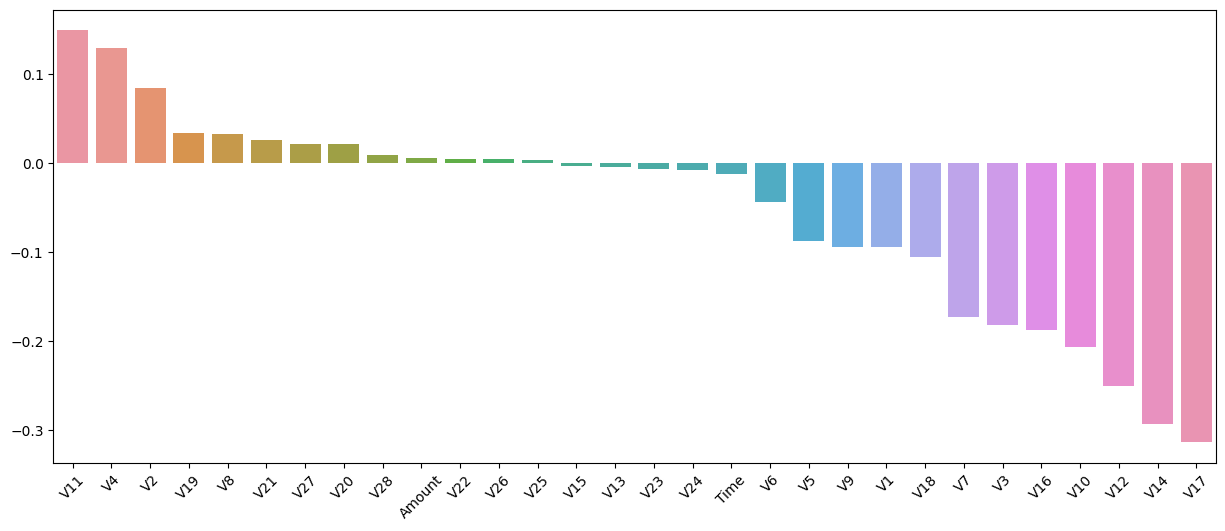

In [16]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45);

In [14]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


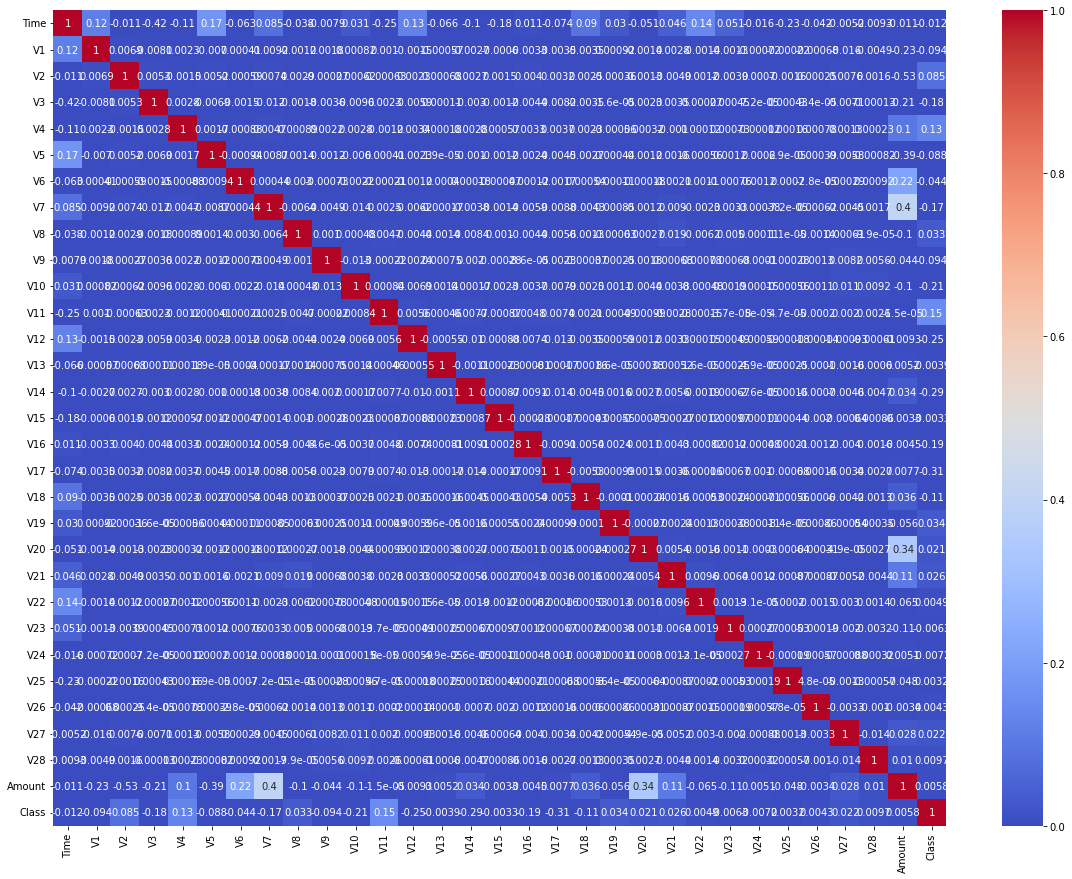

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, vmin=0, vmax=1, cmap='coolwarm')

## Exploring Highly Correlated Features

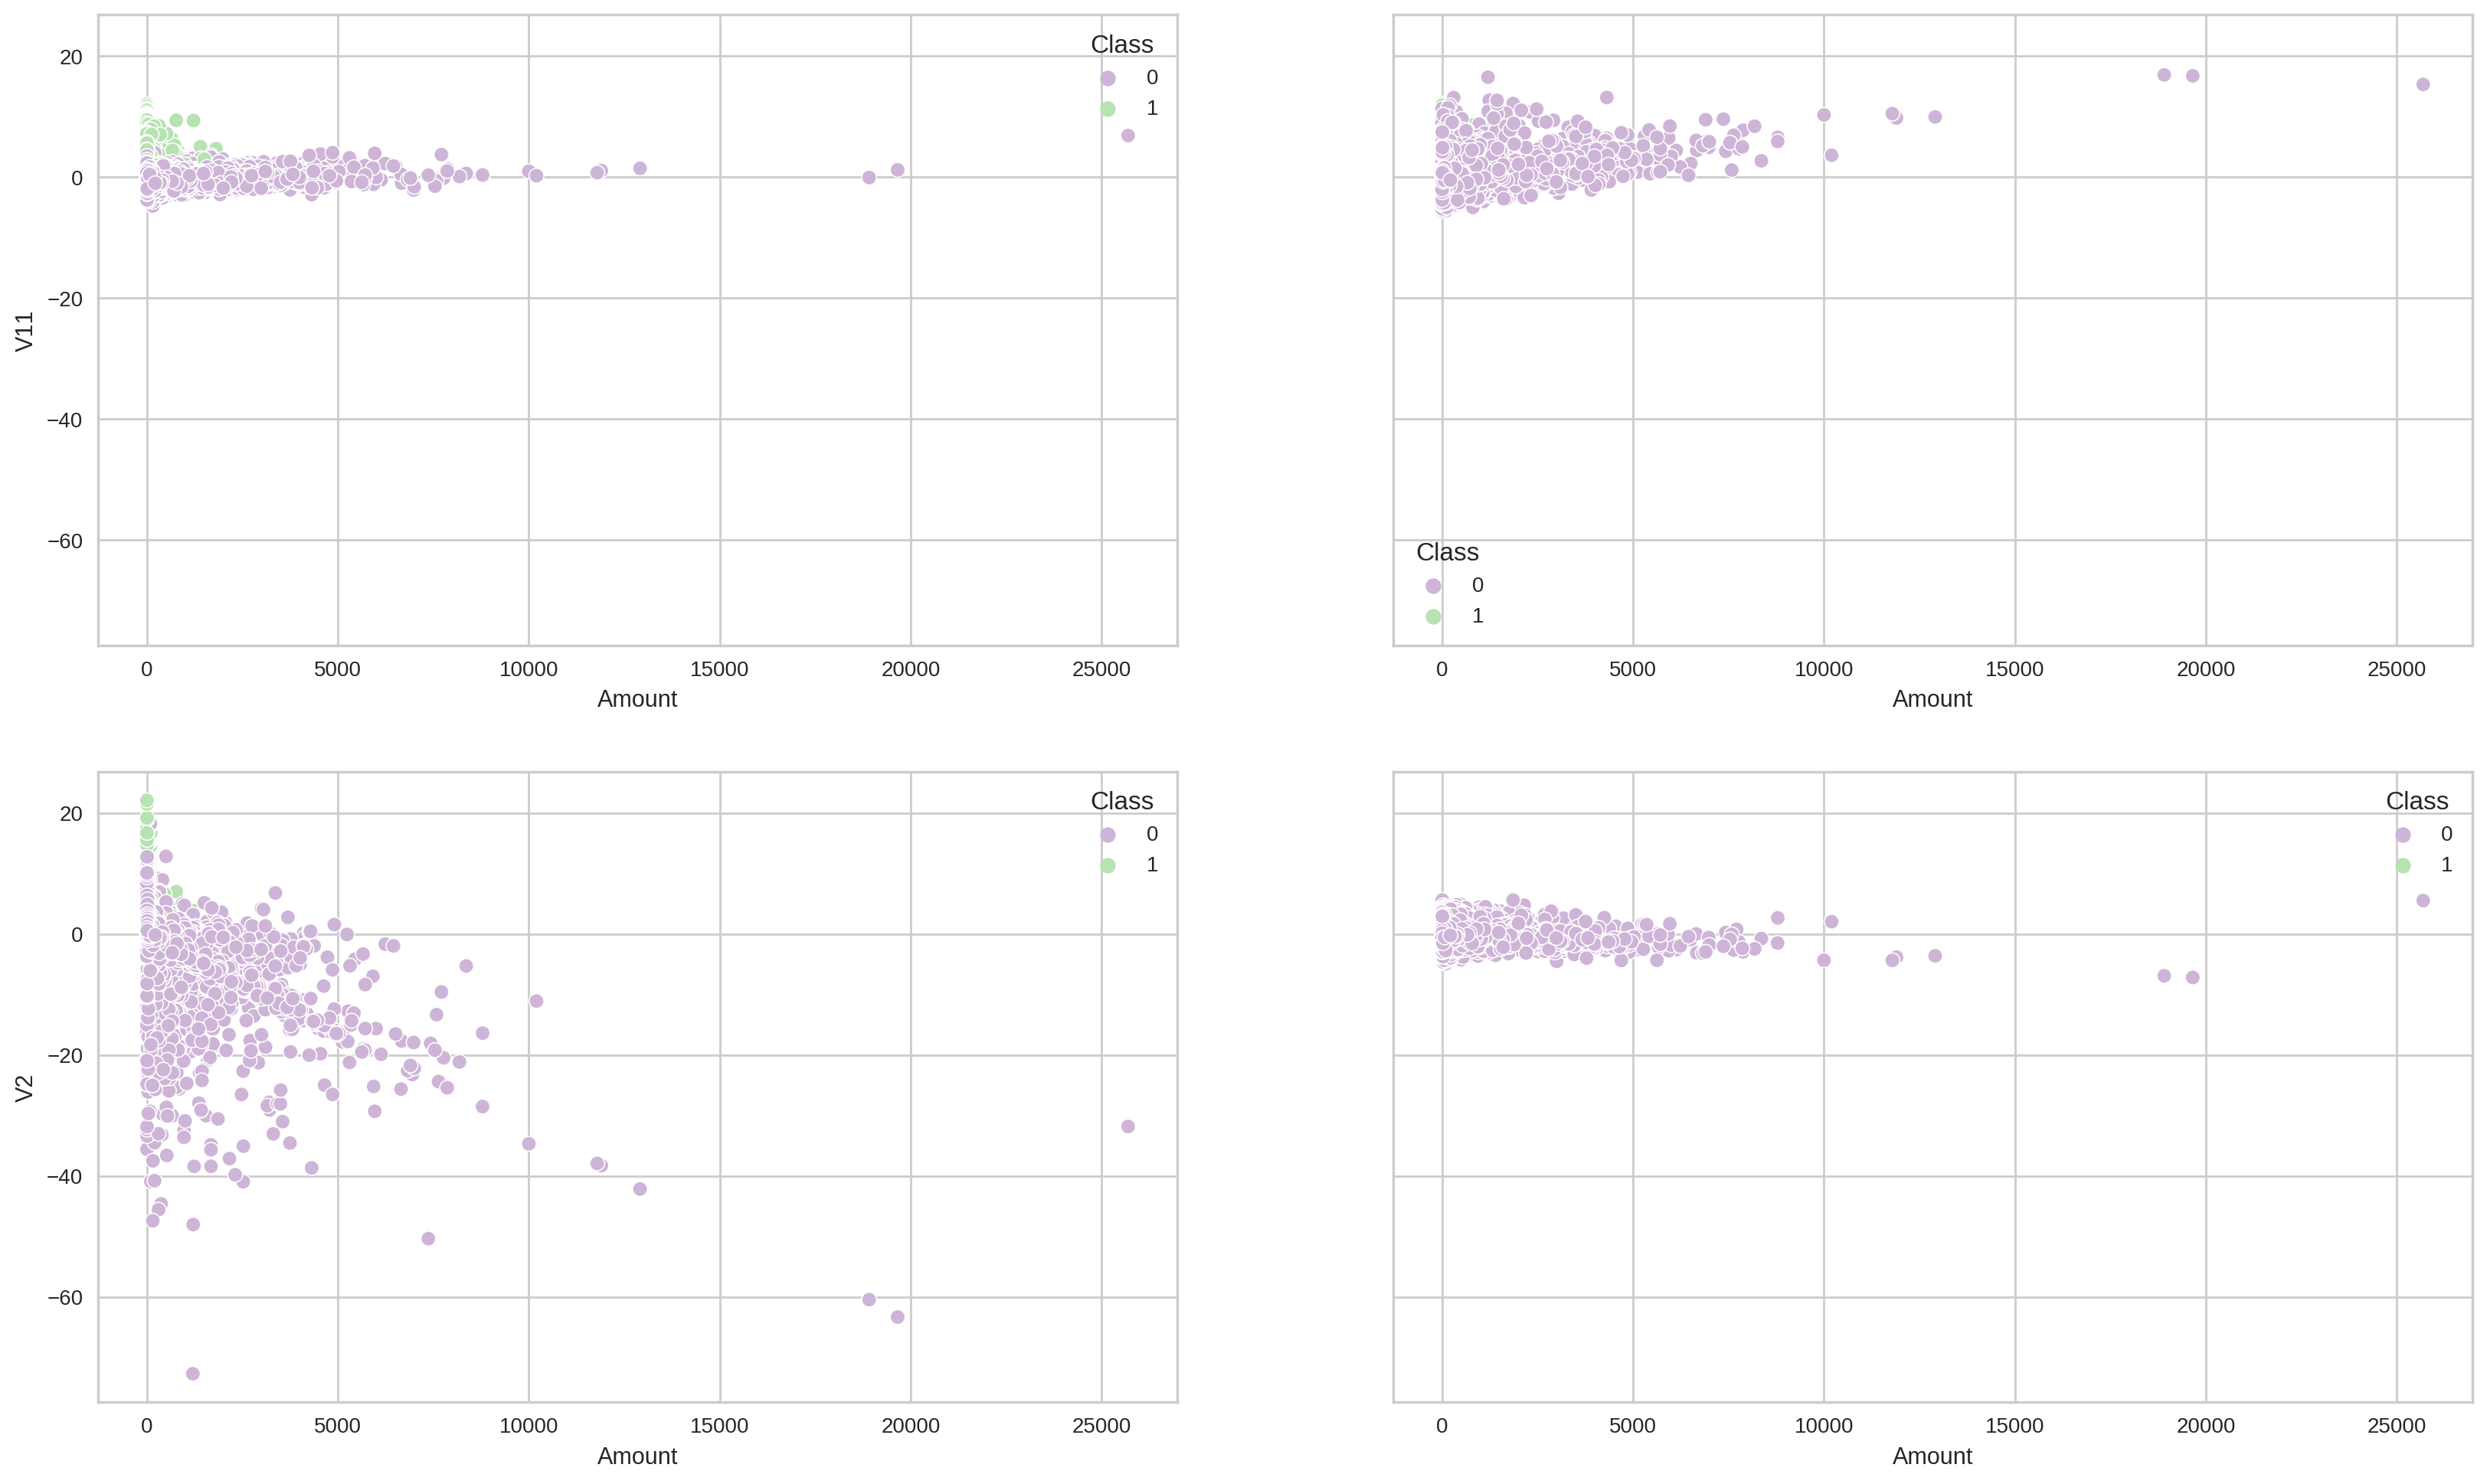

In [162]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V11', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V4', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V2', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V19', hue = 'Class',  ax=ax[1,1], palette='PRGn');

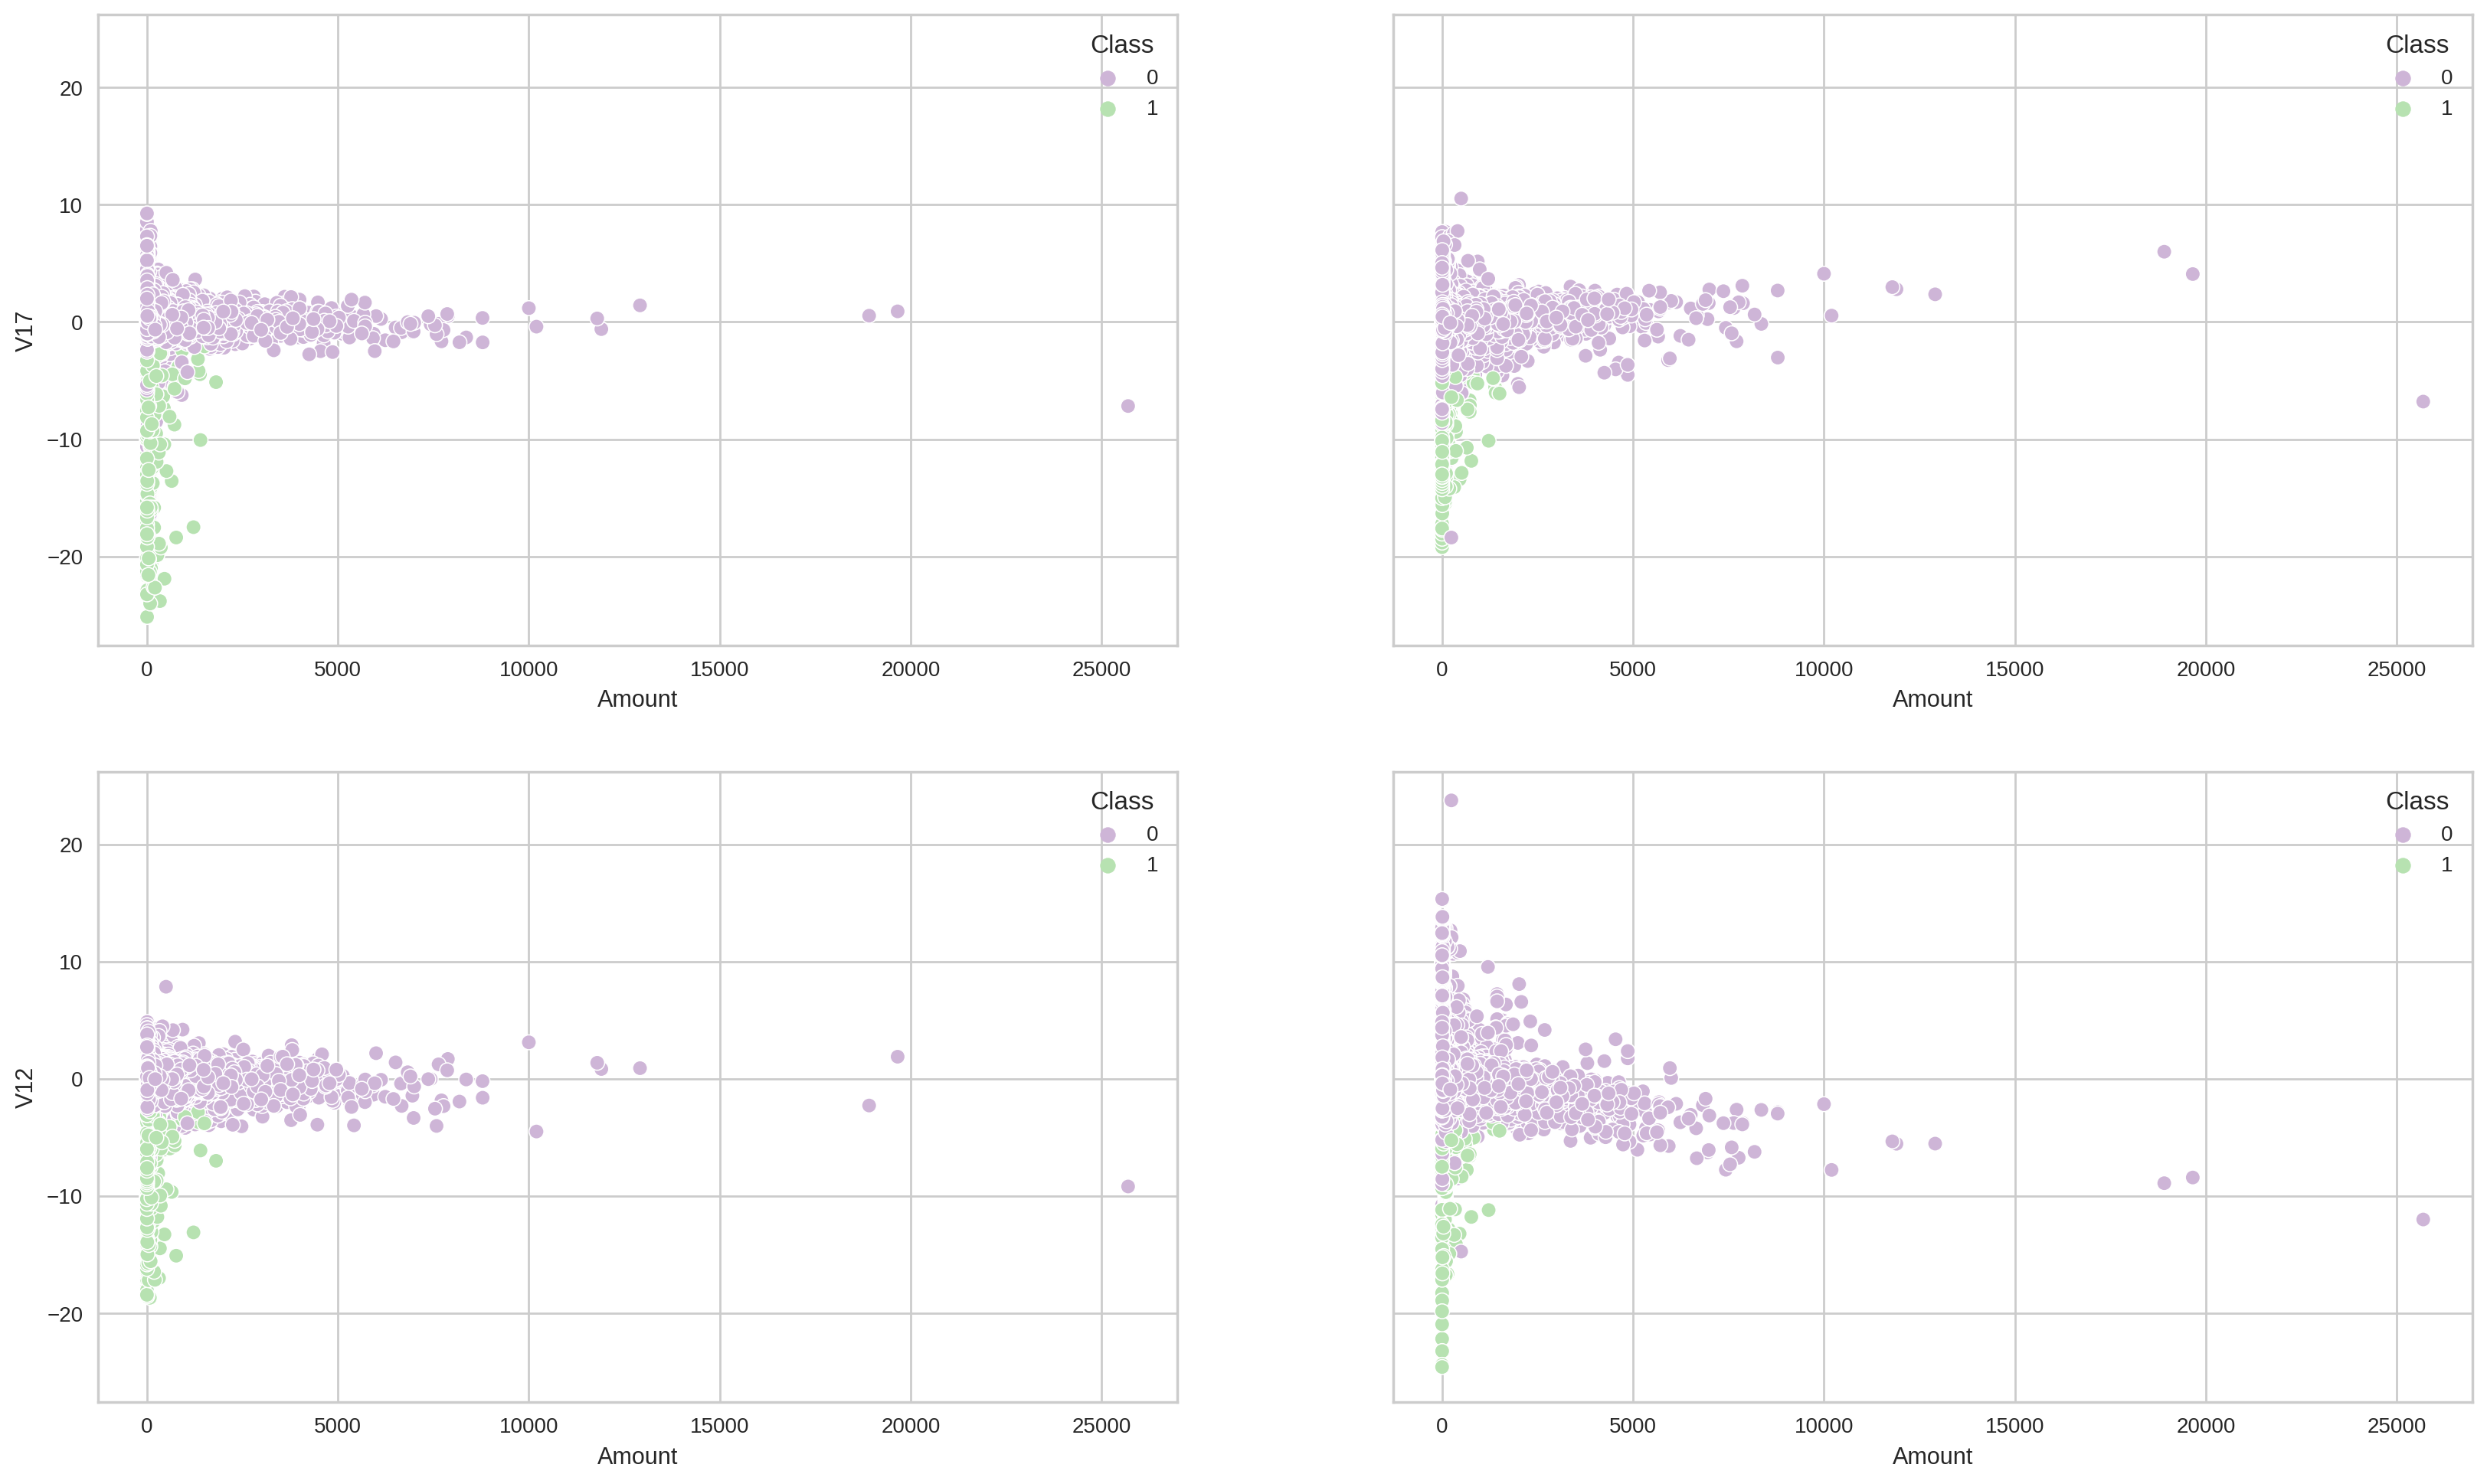

In [163]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V17', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V14', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V12', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V10', hue = 'Class',  ax=ax[1,1], palette='PRGn');

In [17]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

## We set a threshold value for highly correlated columns

In [18]:
df[(df["V17"] < 0.4 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [19]:
df[(df["V14"]< 0.5 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
df[(df["V12"]< 0.1 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [21]:
df[(df["V10"]< 0.2 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Generated new data to try algorithms.

In [22]:
df_filter = df[(df["Class"] == 1) | (df["V17"]< 0.4) & (df["V14"]< 0.5) & (df["V12"] < 0.1) & (df["V10"]<=0.2)]
df_filter

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0
36,27.0,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284773,172761.0,-0.066136,0.996296,-0.918564,-0.923242,1.256522,0.047446,0.705820,0.232330,0.213157,...,-0.397210,-1.038099,0.002120,-0.512741,-0.349721,0.168693,0.316674,0.120065,3.57,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [23]:
df_filter.Class.value_counts()

0    32547
1      473
Name: Class, dtype: int64

In [24]:
df_filter.Class.value_counts(normalize=True)

0    0.985675
1    0.014325
Name: Class, dtype: float64

# Data Cleaning
Missing Values and Outliers

In [25]:
df.isnull().any().sum()

0

## Outliers

In [26]:
def detect_outliers(data:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [27]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
iqr=2
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_filter, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Logarithmed

4342 outliers in 'V1'
8872 outliers in 'V2'
1764 outliers in 'V3'
4750 outliers in 'V4'
5985 outliers in 'V5'
18954 outliers in 'V6'
5725 outliers in 'V7'
17099 outliers in 'V8'
2915 outliers in 'V9'
5624 outliers in 'V10'
312 outliers in 'V11'
8214 outliers in 'V12'
403 outliers in 'V13'
6998 outliers in 'V14'
565 outliers in 'V15'
2860 outliers in 'V16'
3899 outliers in 'V17'
1717 outliers in 'V18'
4449 outliers in 'V19'
20631 outliers in 'V20'
11071 outliers in 'V21'
599 outliers in 'V22'
13211 outliers in 'V23'
446 outliers in 'V24'
2206 outliers in 'V25'
1254 outliers in 'V26'
27395 outliers in 'V27'
21051 outliers in 'V28'
25950 outliers in 'Amount'

229261 OUTLIERS TOTALLY


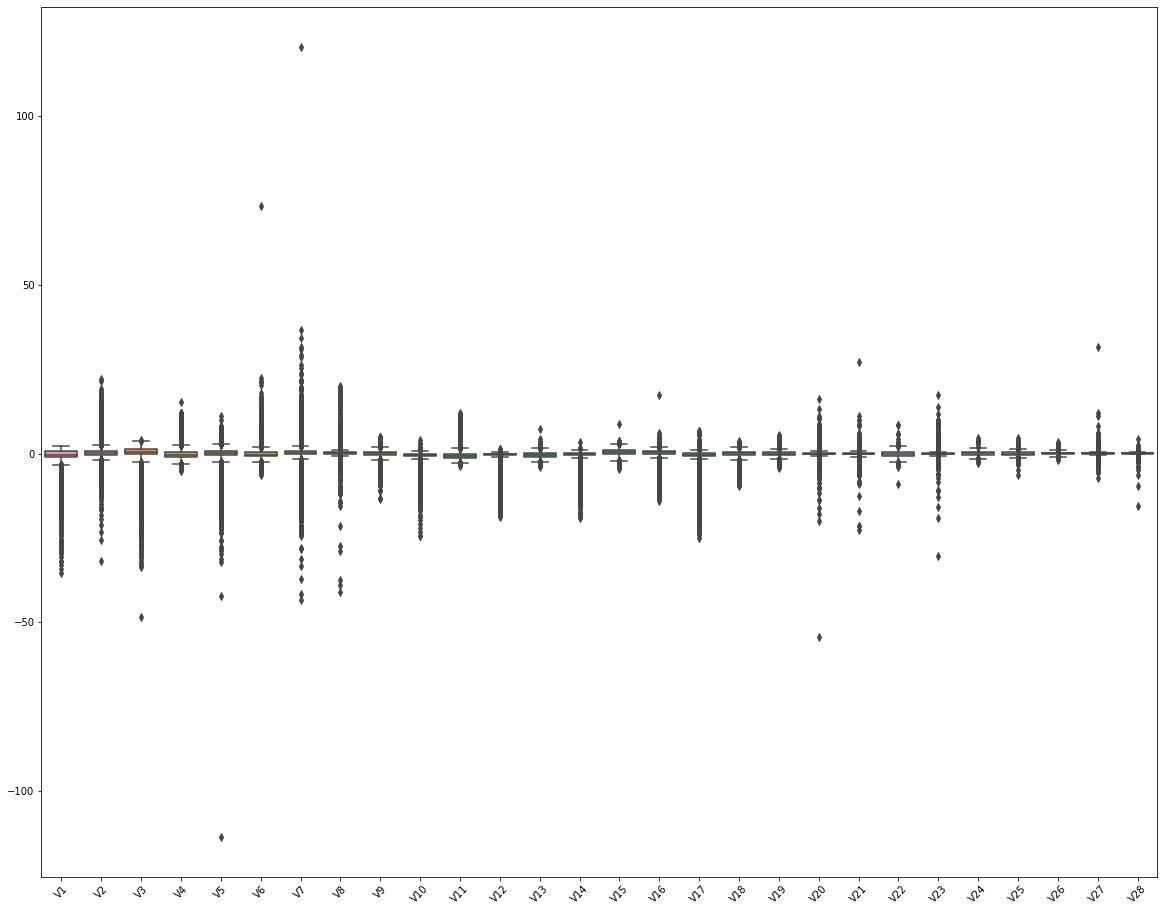

In [28]:
plt.figure(figsize=(20,16))
sns.boxplot(data = df_filter.loc[:,(df_filter.columns != 'Time') & (df_filter.columns != 'Amount')& (df_filter.columns != 'Class')])
plt.xticks(rotation=45);

In [29]:
df_filter[df_filter.Class == 0].Amount.describe()

count    32547.000000
mean        94.274576
std        324.566115
min          0.000000
25%          4.260000
50%         18.710000
75%         70.000000
max      25691.160000
Name: Amount, dtype: float64

In [30]:
df_filter[df_filter.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
df_filter[df_filter.Class == 0].Time.describe()

count     32547.000000
mean      93890.345009
std       46473.829905
min           0.000000
25%       54425.000000
50%       80167.000000
75%      138588.000000
max      172792.000000
Name: Time, dtype: float64

In [32]:
df_filter[df_filter.Class == 1].Time.describe()

count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

---
---


# 2. Data Preprocessing

In [35]:
# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#!pip install optuna

# import optuna
# optuna.logging.set_verbosity(0)
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows",900)
pd.set_option("display.max_colwidth",200)
import warnings
warnings.filterwarnings("ignore")

# 3. Model Building
It was previously stated that we need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that we can evaluate the effectiveness of SMOTE. For this reason, we will implement algorithms in two different ways, with SMOTE applied and without.

***Note***: 

- *If the cross validation method is used to be more sure of the performance of the model for unbalanced data, we should make sure that the class distributions in the iterations are equal. For this case, we should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

## Comparison of models with scale (No Smote) in Orjinal Data 

In [36]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []



for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score train
0,XGB,0.999518,0.999708,0.738806,0.852507,0.828452,0.908805
1,RF,0.999507,1.000000,0.723881,1.000000,0.822034,1.000000
2,SVM,0.999366,0.999698,0.634328,0.837758,0.758929,0.904459
3,ADA,0.999248,0.999230,0.634328,0.684366,0.726496,0.752026
4,LR,0.999166,0.999194,0.552239,0.622419,0.675799,0.725086
5,GBC,0.999060,0.999074,0.477612,0.530973,0.615385,0.661765
6,LightGBM,0.995712,0.996093,0.343284,0.398230,0.201313,0.258126


## Comparison of the models with scaling in df_filter

In [37]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []


for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
0,ADA,0.999192,0.999481,0.962121,0.982405,0.969466,0.982405,0.976923,0.982405
1,RF,0.998890,1.000000,0.946970,1.000000,0.957854,1.000000,0.968992,1.000000
2,XGB,0.998789,0.999524,0.939394,0.982405,0.953846,0.983847,0.968750,0.985294
3,GBC,0.998486,0.999957,0.931818,0.997067,0.942529,0.998532,0.953488,1.000000
4,LightGBM,0.997678,1.000000,0.878788,1.000000,0.909804,1.000000,0.943089,1.000000
5,SVM,0.997476,0.998572,0.833333,0.920821,0.897959,0.950076,0.973451,0.981250
6,LR,0.995356,0.995414,0.787879,0.780059,0.818898,0.833856,0.852459,0.895623


## With Smote and Scale

In [38]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [39]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

models = []
models.append(("XGB",XGBClassifier(random_state = 42)))
models.append(("LightGBM", LGBMClassifier(random_state = 42)))
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []
precision_scores = []
precision_scores_train = []

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    precision_scores.append(precision_score(y_test,y_pred))    
    precision_scores_train.append(precision_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score Train" : f1_scores_train,\
             "Precision Score Test":precision_scores, "Precision Score Train":precision_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

,Model,Accuracy Score Test,Accuracy Score Train,Recall Score Test,Recall Score Train,F1 Score Test,F1 Score Train,Precision Score Test,Precision Score Train
0,RF,0.996928,1.000000,0.996416,1.000000,0.996926,1.000000,0.997437,1.000000
1,LightGBM,0.996928,1.000000,0.995392,1.000000,0.996923,1.000000,0.998459,1.000000
2,GBC,0.996416,0.998683,0.993344,0.998464,0.996405,0.998683,0.999485,0.998902
3,XGB,0.994880,0.998244,0.992320,0.998903,0.994867,0.998245,0.997427,0.997589
4,ADA,0.994624,0.996927,0.992832,0.996269,0.994614,0.996925,0.996403,0.997582
5,SVM,0.990783,0.990672,0.985151,0.984416,0.990731,0.990613,0.996375,0.996888
6,LR,0.986687,0.985404,0.980543,0.977173,0.986605,0.985283,0.992742,0.993528


## Train and Test results for Logistic Regression model (WITHOUT SMOTE)

In [186]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

---------------------Test Scores---------------------
[[9756   18]
 [  28  104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.85      0.79      0.82       132

    accuracy                           1.00      9906
   macro avg       0.92      0.89      0.91      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores--------------------
[[22742    31]
 [   75   266]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22773
           1       0.90      0.78      0.83       341

    accuracy                           1.00     23114
   macro avg       0.95      0.89      0.92     23114
weighted avg       1.00      1.00      1.00     23114



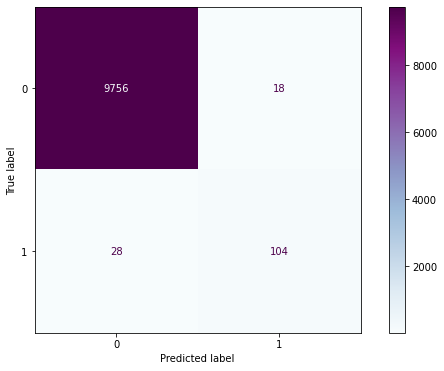

In [40]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression 
LR= LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = LR.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(LR, X_test, y_test,cmap="BuPu");

## Logistic Regression ROC (Receiver Operating Curve) and AUC (Area Under Curve)

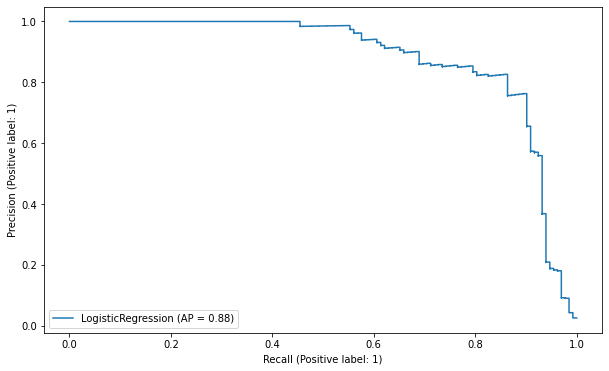

In [41]:
plot_precision_recall_curve(LR, X_test, y_test);

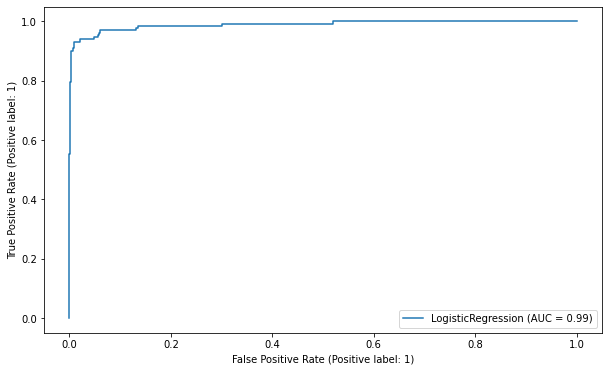

In [42]:
plot_roc_curve(LR,X_test,y_test);

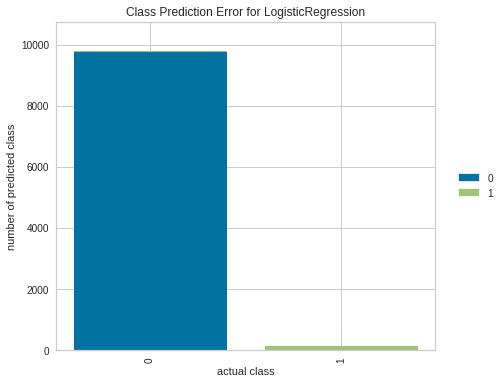

In [43]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(LR)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

## Logistic Regression GridSearchCV

In [210]:
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression(random_state=42)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=LR,
                          param_grid=param_grid,
                          cv=5,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [211]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [212]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}

---------------------Test Scores---------------------
[[9652  122]
 [  10  122]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9774
           1       0.50      0.92      0.65       132

    accuracy                           0.99      9906
   macro avg       0.75      0.96      0.82      9906
weighted avg       0.99      0.99      0.99      9906

---------------------Train Scores--------------------
[[22464   309]
 [   14   327]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22773
           1       0.51      0.96      0.67       341

    accuracy                           0.99     23114
   macro avg       0.76      0.97      0.83     23114
weighted avg       0.99      0.99      0.99     23114



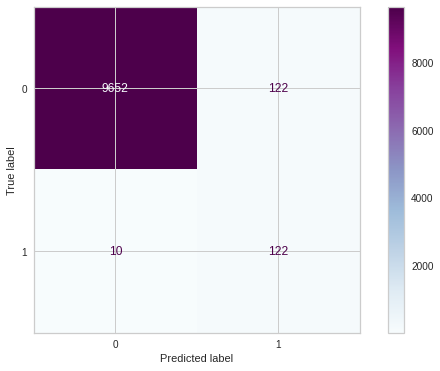

In [214]:
y_pred = grid_model.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = grid_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(grid_model, X_test, y_test,cmap="BuPu");

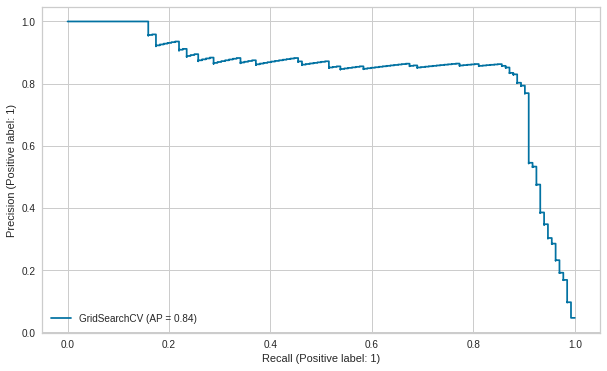

In [215]:
plot_precision_recall_curve(grid_model, X_test, y_test);

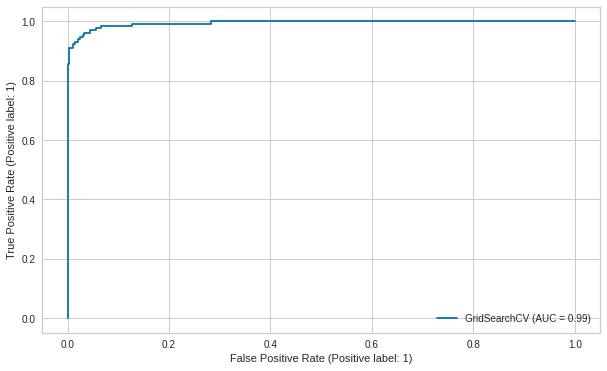

In [216]:
plot_roc_curve(grid_model,X_test,y_test);

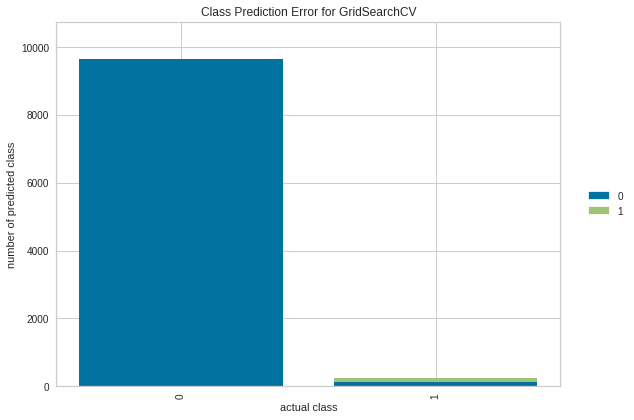

In [217]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Applying Stratified KFold (With GridSearchCV parameters)

In [44]:
print('Class Ratio:',sum(df_filter['Class'])/len(df_filter['Class']))

Class Ratio: 0.01432465172622653


In [45]:
# import pandas as pd
from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5)

LR = LogisticRegression(C = 0.1, class_weight = 'balanced', penalty = 'l2', solver = 'sag', random_state=42)

def train_model(train, test, fold_no):
      X = df_filter.drop(['Class'],axis=1)
      y = df_filter['Class']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test  = scaler.transform(X_test)
      LR.fit(X_train,y_train)
      y_pred = LR.predict(X_test)
      print('Fold',str(fold_no),'Accuracy:', accuracy_score(y_test,y_pred))

fold_no = 1
for train_index, test_index in skf.split(X, y):
      train = df_filter.iloc[train_index,:]
      test = df_filter.iloc[test_index,:]
      train_model(train,test,fold_no)
      fold_no += 1

Fold 1 Accuracy: 0.9866747425802543
Fold 2 Accuracy: 0.9866747425802543
Fold 3 Accuracy: 0.9866747425802543
Fold 4 Accuracy: 0.9866747425802543
Fold 5 Accuracy: 0.9866747425802543


We have a good robust model trained on 5 folds and has given a mean accuracy of nearly 98%. Now we should not consider this as the final model. Because till now, we have only focused on overall accuracy, which is not the correct measure for the model. This model should be evaluated against various performance metrics to ensure the robustness of the model. 

Now as we have our classifier trained on different folds,  we are going to check the performance of our model with the test data and we will try to understand how all the below matrices are significantly important for classification problems.   

---------------------Test Scores---------------------
[[9756   18]
 [  28  104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.85      0.79      0.82       132

    accuracy                           1.00      9906
   macro avg       0.92      0.89      0.91      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores--------------------
[[22464   309]
 [   14   327]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     22773
           1       0.51      0.96      0.67       341

    accuracy                           0.99     23114
   macro avg       0.76      0.97      0.83     23114
weighted avg       0.99      0.99      0.99     23114



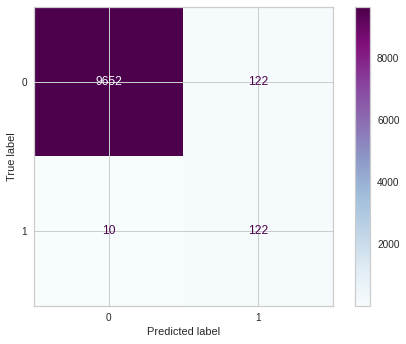

In [46]:
print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = LR.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(LR, X_test, y_test,cmap="BuPu");

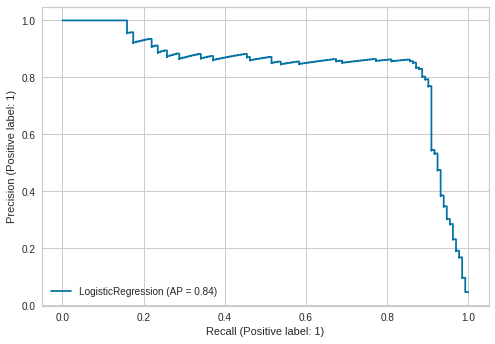

In [47]:
plot_precision_recall_curve(LR, X_test, y_test);

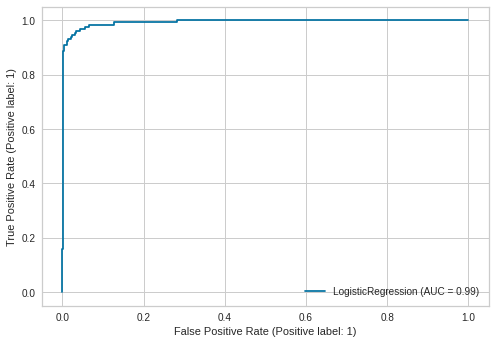

In [48]:
plot_roc_curve(LR,X_test,y_test);

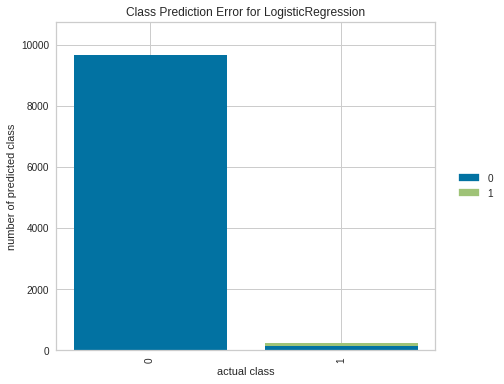

In [49]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(LR)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

## Train and Test results for Logistic Regression model (WITH SMOTE and GridSearch Parameters)

---------------------Test Scores---------------------
[[1945    8]
 [  80 1873]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1953
           1       1.00      0.96      0.98      1953

    accuracy                           0.98      3906
   macro avg       0.98      0.98      0.98      3906
weighted avg       0.98      0.98      0.98      3906

---------------------Train Scores--------------------
[[4539   17]
 [ 168 4388]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4556
           1       1.00      0.96      0.98      4556

    accuracy                           0.98      9112
   macro avg       0.98      0.98      0.98      9112
weighted avg       0.98      0.98      0.98      9112



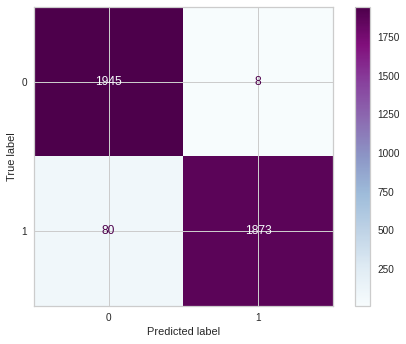

In [50]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# from sklearn.linear_model import LogisticRegression 
LR= LogisticRegression(C = 0.1, class_weight = 'balanced', penalty = 'l2', solver = 'sag', random_state=42)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = LR.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(LR, X_test, y_test,cmap="BuPu");

## Logistic Regression ROC (Receiver Operating Curve) and AUC (Area Under Curve)

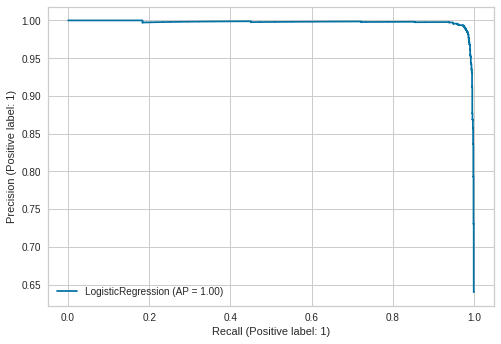

In [52]:
plot_precision_recall_curve(LR, X_test, y_test);

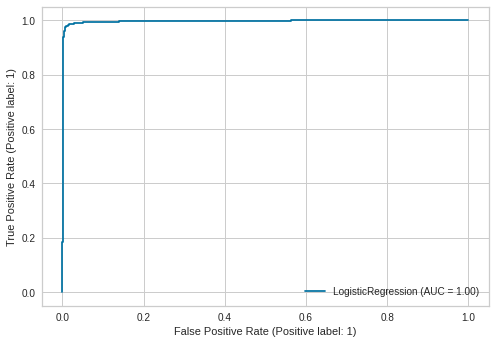

In [53]:
plot_roc_curve(LR,X_test,y_test);

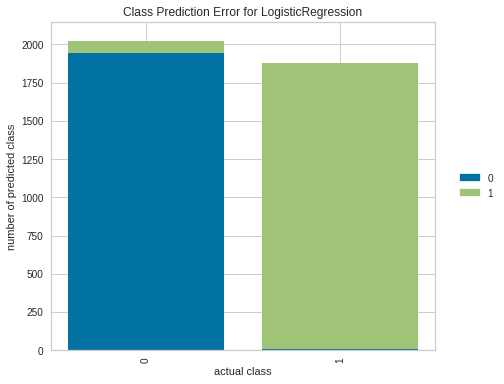

In [54]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(LR)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

## Train and Test results for Random Forest model (WITHOUT SMOTE)

---------------------Test Scores---------------------
[[9768    6]
 [  13  119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.95      0.90      0.93       132

    accuracy                           1.00      9906
   macro avg       0.98      0.95      0.96      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores--------------------
[[22773     0]
 [    0   341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22773
           1       1.00      1.00      1.00       341

    accuracy                           1.00     23114
   macro avg       1.00      1.00      1.00     23114
weighted avg       1.00      1.00      1.00     23114



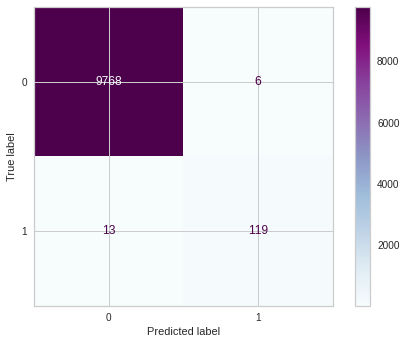

In [55]:
X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(class_weight = "balanced", random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = RF.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF, X_test, y_test,cmap="BuPu");

## Random Forest ROC (Receiver Operating Curve) and AUC (Area Under Curve)

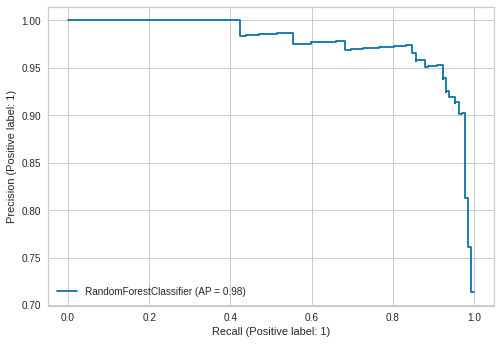

In [56]:
plot_precision_recall_curve(RF, X_test, y_test);

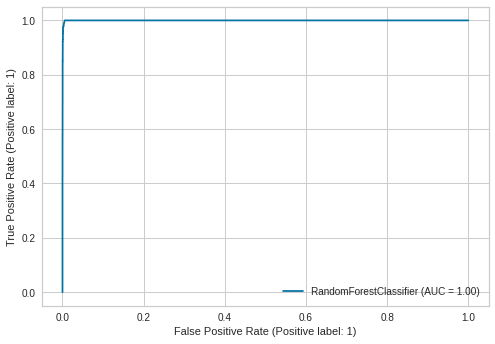

In [57]:
plot_roc_curve(RF,X_test,y_test);

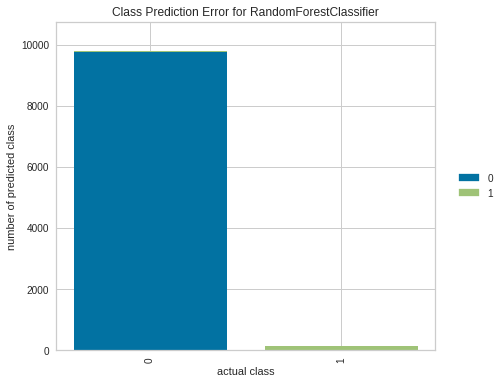

In [58]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

## Random Forest GridSearchCV

In [235]:
# from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [50, 100, 300],
             'max_features' : [2, 3, 4],
             'max_depth' : [3, 5, 7, 9],
             'min_samples_split' : [2, 5, 8]}

RF = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
grid_model = GridSearchCV(estimator = RF, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2)



In [236]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 100, 300]},
             scoring='recall', verbose=2)

In [237]:
grid_model.best_params_

{'max_depth': 7, 'max_features': 4, 'min_samples_split': 8, 'n_estimators': 50}

In [238]:
grid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4,
                       min_samples_split=8, n_estimators=50, random_state=42)

---------------------Test Scores---------------------
[[9755   19]
 [  11  121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.86      0.92      0.89       132

    accuracy                           1.00      9906
   macro avg       0.93      0.96      0.94      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores--------------------
[[22726    47]
 [    4   337]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22773
           1       0.88      0.99      0.93       341

    accuracy                           1.00     23114
   macro avg       0.94      0.99      0.96     23114
weighted avg       1.00      1.00      1.00     23114



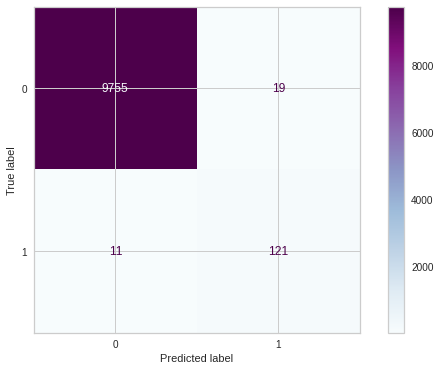

In [239]:
y_pred = grid_model.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = grid_model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(grid_model, X_test, y_test,cmap="BuPu");

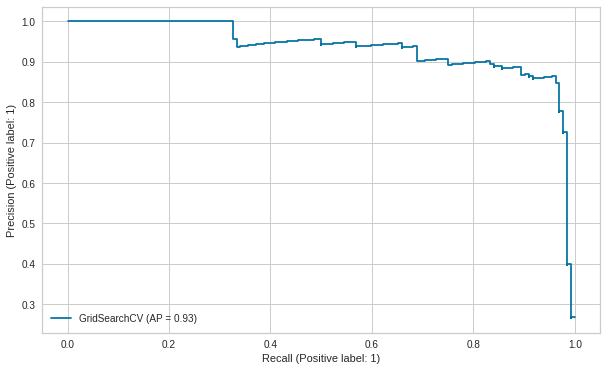

In [240]:
plot_precision_recall_curve(grid_model, X_test, y_test);

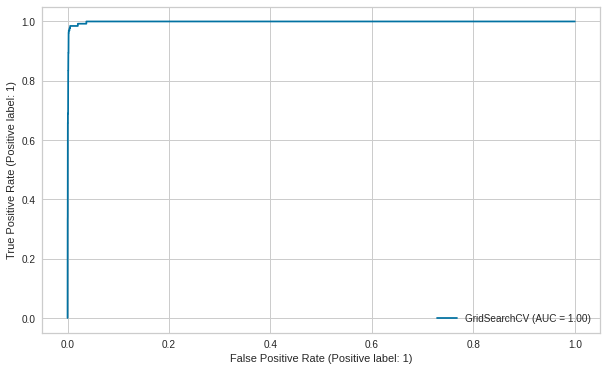

In [241]:
plot_roc_curve(grid_model,X_test,y_test);

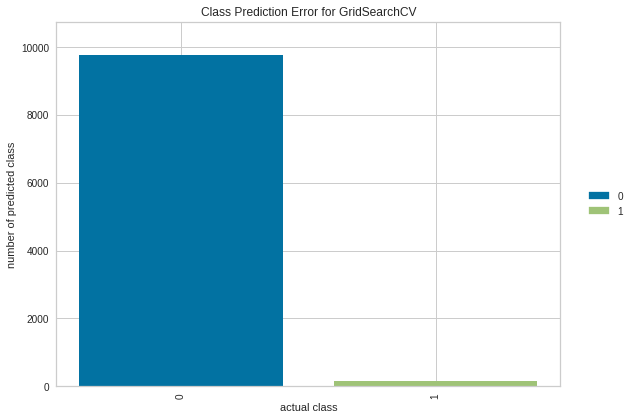

In [242]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Applying Stratified KFold (With GridSearchCV parameters)

In [59]:
# import pandas as pd
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5)

RF= RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4, min_samples_split=8, n_estimators=50, random_state=42)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

def train_model(train, test, fold_no):
      X = df_filter.drop(['Class'],axis=1)
      y = df_filter['Class']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test  = scaler.transform(X_test)
      RF.fit(X_train,y_train)
      y_pred = RF.predict(X_test)
      print('Fold',str(fold_no),'Accuracy:', accuracy_score(y_test,y_pred))

fold_no = 1
for train_index, test_index in skf.split(X, y):
      train = df_filter.iloc[train_index,:]
      test = df_filter.iloc[test_index,:]
      train_model(train,test,fold_no)
      fold_no += 1

Fold 1 Accuracy: 0.9969715324046032
Fold 2 Accuracy: 0.9969715324046032
Fold 3 Accuracy: 0.9969715324046032
Fold 4 Accuracy: 0.9969715324046032
Fold 5 Accuracy: 0.9969715324046032


---------------------Test Scores---------------------
[[9755   19]
 [  11  121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.86      0.92      0.89       132

    accuracy                           1.00      9906
   macro avg       0.93      0.96      0.94      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores--------------------
[[22726    47]
 [    4   337]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22773
           1       0.88      0.99      0.93       341

    accuracy                           1.00     23114
   macro avg       0.94      0.99      0.96     23114
weighted avg       1.00      1.00      1.00     23114



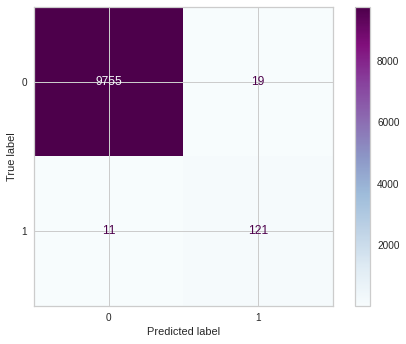

In [60]:
print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = RF.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF, X_test, y_test,cmap="BuPu");

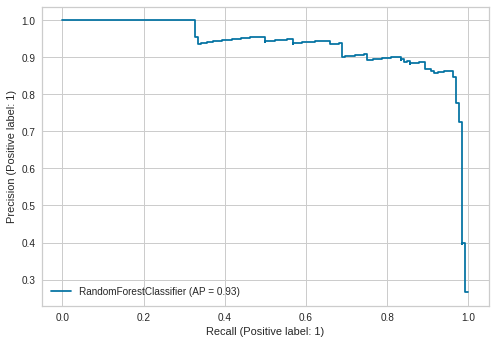

In [61]:
plot_precision_recall_curve(RF, X_test, y_test);

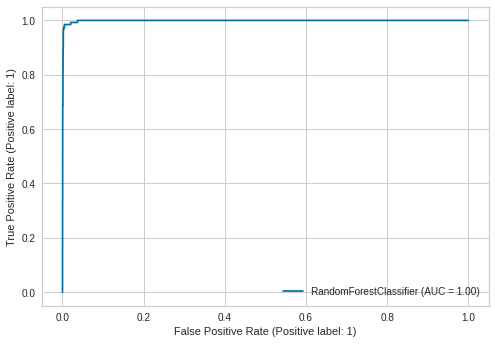

In [62]:
plot_roc_curve(RF,X_test,y_test);

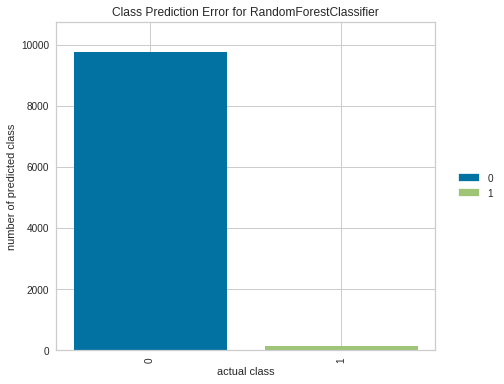

In [63]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

## Train and Test results for Random Forest model (WITH SMOTE and GridSearch parameters)

---------------------Test Scores---------------------
[[1950    3]
 [  44 1909]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1953
           1       1.00      0.98      0.99      1953

    accuracy                           0.99      3906
   macro avg       0.99      0.99      0.99      3906
weighted avg       0.99      0.99      0.99      3906

---------------------Train Scores--------------------
[[4544   12]
 [  43 4513]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4556
           1       1.00      0.99      0.99      4556

    accuracy                           0.99      9112
   macro avg       0.99      0.99      0.99      9112
weighted avg       0.99      0.99      0.99      9112



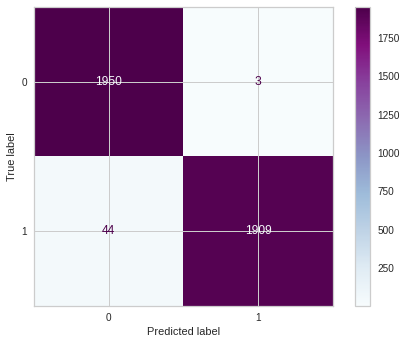

In [64]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4, min_samples_split=8, n_estimators=50, random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = RF.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF, X_test, y_test,cmap="BuPu");



## Random Forest ROC (Receiver Operating Curve) and AUC (Area Under Curve)

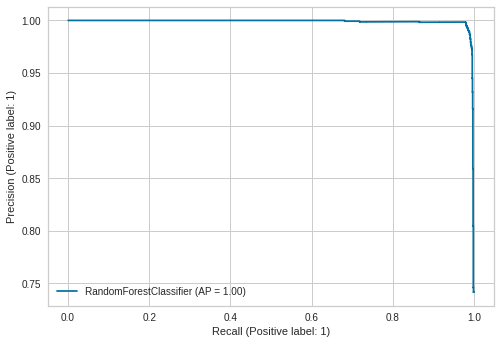

In [65]:
plot_precision_recall_curve(RF, X_test, y_test);

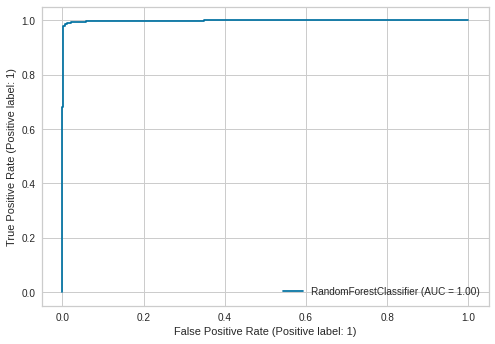

In [66]:
plot_roc_curve(RF,X_test,y_test);

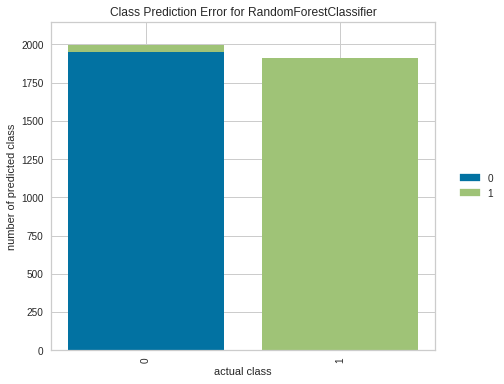

In [67]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(RF)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

## Logistic Regression Final Model

---------------------Test Scores---------------------
[[1946    7]
 [  62 1891]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1953
           1       1.00      0.97      0.98      1953

    accuracy                           0.98      3906
   macro avg       0.98      0.98      0.98      3906
weighted avg       0.98      0.98      0.98      3906

---------------------Train Scores--------------------
[[4535   21]
 [ 153 4403]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4556
           1       1.00      0.97      0.98      4556

    accuracy                           0.98      9112
   macro avg       0.98      0.98      0.98      9112
weighted avg       0.98      0.98      0.98      9112



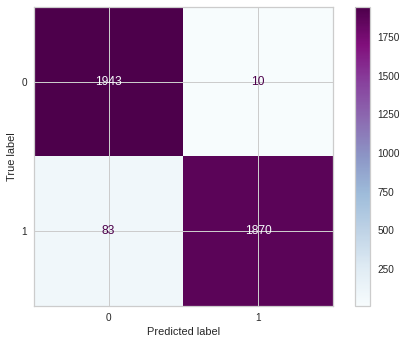

In [68]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# from sklearn.linear_model import LogisticRegression 
Log_Reg= LogisticRegression(C = 0.1, class_weight = 'balanced', penalty = 'l2', solver = 'sag', random_state=42)
Log_Reg.fit(X_train, y_train)
y_pred = Log_Reg.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = Log_Reg.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(LR, X_test, y_test,cmap="BuPu");

## Feature Importance (df_filter)/Logistic Regression

Feature: 0, Score: -0.36484
Feature: 1, Score: 0.56341
Feature: 2, Score: -0.19008
Feature: 3, Score: -1.24550
Feature: 4, Score: 2.96576
Feature: 5, Score: 0.55440
Feature: 6, Score: -0.51350
Feature: 7, Score: -0.48580
Feature: 8, Score: -1.63862
Feature: 9, Score: -0.60938
Feature: 10, Score: -0.12014
Feature: 11, Score: 2.24139
Feature: 12, Score: -0.20466
Feature: 13, Score: 0.27524
Feature: 14, Score: -2.48058
Feature: 15, Score: -0.40853
Feature: 16, Score: -1.03300
Feature: 17, Score: 1.02014
Feature: 18, Score: 0.18373
Feature: 19, Score: 0.36793
Feature: 20, Score: -0.43028
Feature: 21, Score: 0.35522
Feature: 22, Score: 0.55920
Feature: 23, Score: -0.07158
Feature: 24, Score: -0.00091
Feature: 25, Score: 0.07418
Feature: 26, Score: -0.14253
Feature: 27, Score: -0.51632
Feature: 28, Score: 0.39035
Feature: 29, Score: 0.23561


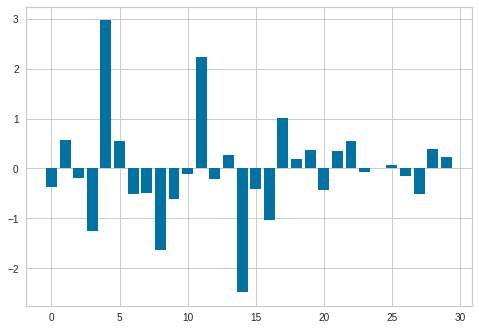

In [69]:
# get importance
importance = Log_Reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [70]:
Log_Reg.coef_[0]

array([-3.64839085e-01,  5.63413673e-01, -1.90079469e-01, -1.24549780e+00,
        2.96576088e+00,  5.54399368e-01, -5.13500234e-01, -4.85797898e-01,
       -1.63862150e+00, -6.09380221e-01, -1.20142828e-01,  2.24138912e+00,
       -2.04662937e-01,  2.75242339e-01, -2.48057707e+00, -4.08527788e-01,
       -1.03299540e+00,  1.02014475e+00,  1.83728976e-01,  3.67933309e-01,
       -4.30283937e-01,  3.55219338e-01,  5.59200538e-01, -7.15824025e-02,
       -9.08055193e-04,  7.41784247e-02, -1.42531377e-01, -5.16324120e-01,
        3.90347639e-01,  2.35613895e-01])

In [71]:
Log_Reg.coef_

array([[-3.64839085e-01,  5.63413673e-01, -1.90079469e-01,
        -1.24549780e+00,  2.96576088e+00,  5.54399368e-01,
        -5.13500234e-01, -4.85797898e-01, -1.63862150e+00,
        -6.09380221e-01, -1.20142828e-01,  2.24138912e+00,
        -2.04662937e-01,  2.75242339e-01, -2.48057707e+00,
        -4.08527788e-01, -1.03299540e+00,  1.02014475e+00,
         1.83728976e-01,  3.67933309e-01, -4.30283937e-01,
         3.55219338e-01,  5.59200538e-01, -7.15824025e-02,
        -9.08055193e-04,  7.41784247e-02, -1.42531377e-01,
        -5.16324120e-01,  3.90347639e-01,  2.35613895e-01]])

In [72]:
df_filter.drop(['Class'],axis=1).columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [73]:
df_filter.drop(['Class'],axis=1).columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

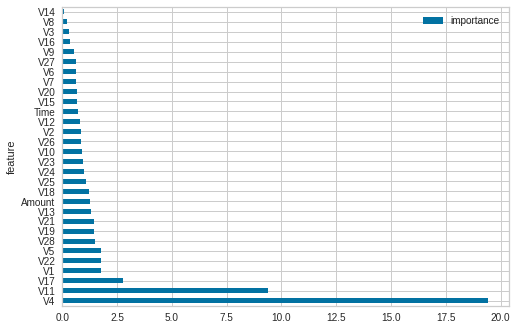

In [74]:
import math
feature_importance = pd.DataFrame(df_filter.drop(['Class'],axis=1).columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, Log_Reg.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
# from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

### Default results (without Cross-validation) without applying smote to selected columns (Logistic  Regression).

---------------------Test Scores---------------------
[[9555  209]
 [  15  127]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9764
           1       0.38      0.89      0.53       142

    accuracy                           0.98      9906
   macro avg       0.69      0.94      0.76      9906
weighted avg       0.99      0.98      0.98      9906

---------------------Train Scores---------------------
[[22277   506]
 [   21   310]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22783
           1       0.38      0.94      0.54       331

    accuracy                           0.98     23114
   macro avg       0.69      0.96      0.76     23114
weighted avg       0.99      0.98      0.98     23114



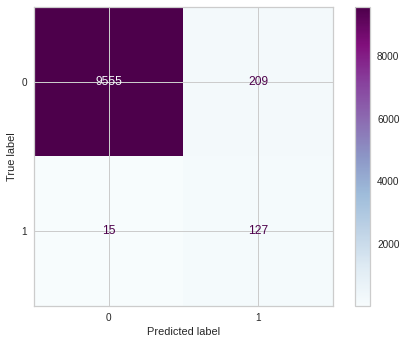

In [75]:
df_filter_feature = df_filter[["V4","V11","V17","V5","V22","V1"]]
df_filter_feature["Class"] = df.Class
X = df_filter_feature.drop(columns="Class")
y = df_filter_feature.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Log_Reg.fit(X_train, y_train)
y_pred = Log_Reg.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = Log_Reg.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(Log_Reg, X_test, y_test,cmap="BuPu");

### Results by applying smote (Logistic Regression)

---------------------Test Scores---------------------
[[1924   29]
 [ 110 1843]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1953
           1       0.98      0.94      0.96      1953

    accuracy                           0.96      3906
   macro avg       0.97      0.96      0.96      3906
weighted avg       0.97      0.96      0.96      3906

---------------------Train Scores---------------------
[[4478   78]
 [ 322 4234]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4556
           1       0.98      0.93      0.95      4556

    accuracy                           0.96      9112
   macro avg       0.96      0.96      0.96      9112
weighted avg       0.96      0.96      0.96      9112



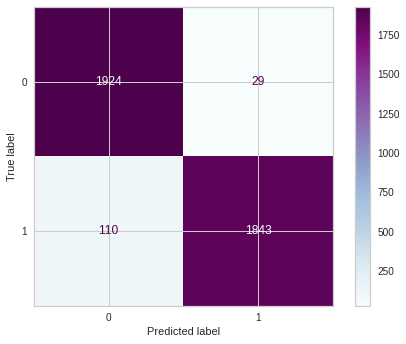

In [76]:
over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Log_Reg.fit(X_train, y_train)
y_pred = Log_Reg.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = Log_Reg.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(Log_Reg, X_test, y_test,cmap="BuPu");

### Determining the columns selected with the original data and seeing the results

---------------------Test Scores---------------------
[[16130   865]
 [ 2081 14914]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     16995
           1       0.95      0.88      0.91     16995

    accuracy                           0.91     33990
   macro avg       0.92      0.91      0.91     33990
weighted avg       0.92      0.91      0.91     33990

---------------------Train Scores---------------------
[[37649  2006]
 [ 4658 34997]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39655
           1       0.95      0.88      0.91     39655

    accuracy                           0.92     79310
   macro avg       0.92      0.92      0.92     79310
weighted avg       0.92      0.92      0.92     79310



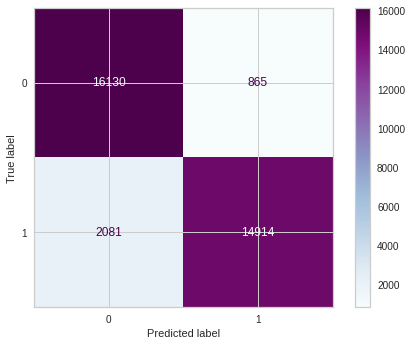

In [77]:
df_final = df[["V4","V11","V17","V5","V22","V1"]]
df_final["Class"] = df.Class
X = df_final.drop(columns="Class")
y = df_final.Class

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Log_Reg.fit(X_train, y_train)
y_pred = Log_Reg.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = Log_Reg.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(Log_Reg, X_test, y_test,cmap="BuPu");

## Random Forest Final Model

---------------------Test Scores---------------------
[[1948    5]
 [  26 1927]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1953
           1       1.00      0.99      0.99      1953

    accuracy                           0.99      3906
   macro avg       0.99      0.99      0.99      3906
weighted avg       0.99      0.99      0.99      3906

---------------------Train Scores--------------------
[[4545   11]
 [  54 4502]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4556
           1       1.00      0.99      0.99      4556

    accuracy                           0.99      9112
   macro avg       0.99      0.99      0.99      9112
weighted avg       0.99      0.99      0.99      9112



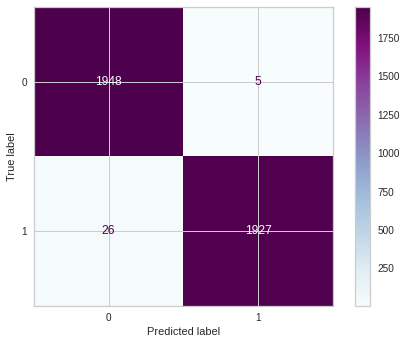

In [78]:
scaler = StandardScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4, min_samples_split=8, n_estimators=50, random_state=42)
RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)

print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("---------------------Train Scores--------------------")
y_pred_train = RF_Model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF_Model, X_test, y_test,cmap="BuPu");

## Feature Importance (df_filter)/Random Forest

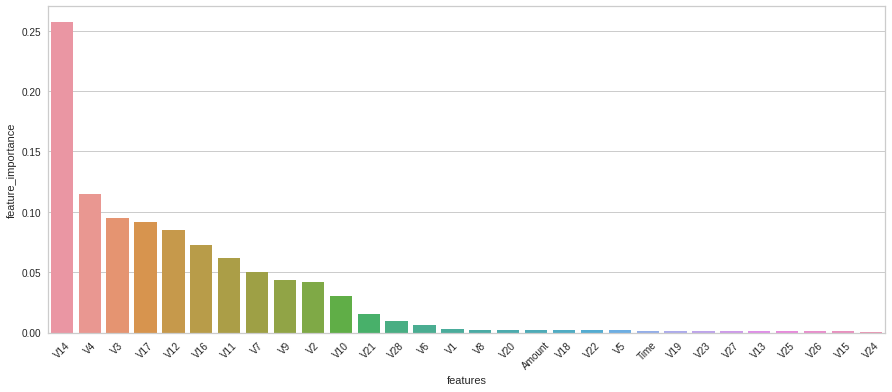

In [79]:
feature_importance = RF_Model.feature_importances_
features = df_filter.drop(columns="Class").columns
fi={'features':features,'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize = (15,6))
sns.barplot(data = df_fi, y='feature_importance', x='features')
plt.xticks(rotation = 45);

### Default results (without Cross-validation) without applying smote to selected columns (Random Forest)

---------------------Test Scores---------------------
[[9742   22]
 [   6  136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9764
           1       0.86      0.96      0.91       142

    accuracy                           1.00      9906
   macro avg       0.93      0.98      0.95      9906
weighted avg       1.00      1.00      1.00      9906

---------------------Train Scores---------------------
[[22739    44]
 [    3   328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22783
           1       0.88      0.99      0.93       331

    accuracy                           1.00     23114
   macro avg       0.94      0.99      0.97     23114
weighted avg       1.00      1.00      1.00     23114



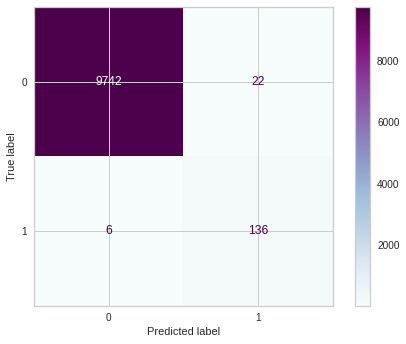

In [80]:
df_filter_feature = df_filter[["V14","V4","V3","V16","V17","V12"]]
df_filter_feature["Class"] = df.Class
X = df_filter_feature.drop(columns="Class")
y = df_filter_feature.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = RF_Model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF_Model, X_test, y_test,cmap="BuPu");

### Results by applying smote (Random Forest)

---------------------Test Scores---------------------
[[1947    6]
 [  41 1912]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1953
           1       1.00      0.98      0.99      1953

    accuracy                           0.99      3906
   macro avg       0.99      0.99      0.99      3906
weighted avg       0.99      0.99      0.99      3906

---------------------Train Scores---------------------
[[4539   17]
 [  78 4478]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4556
           1       1.00      0.98      0.99      4556

    accuracy                           0.99      9112
   macro avg       0.99      0.99      0.99      9112
weighted avg       0.99      0.99      0.99      9112



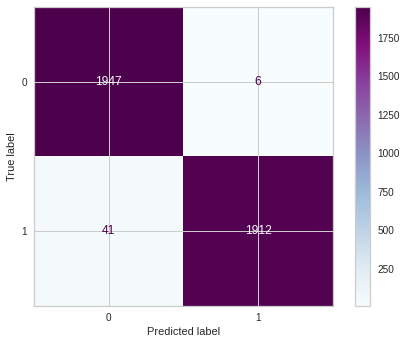

In [81]:
over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = RF_Model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF_Model, X_test, y_test,cmap="BuPu");

### Determining the columns selected with the original data and seeing the results

---------------------Test Scores---------------------
[[16732   263]
 [  987 16008]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16995
           1       0.98      0.94      0.96     16995

    accuracy                           0.96     33990
   macro avg       0.96      0.96      0.96     33990
weighted avg       0.96      0.96      0.96     33990

---------------------Train Scores---------------------
[[39097   558]
 [ 2270 37385]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39655
           1       0.99      0.94      0.96     39655

    accuracy                           0.96     79310
   macro avg       0.97      0.96      0.96     79310
weighted avg       0.97      0.96      0.96     79310



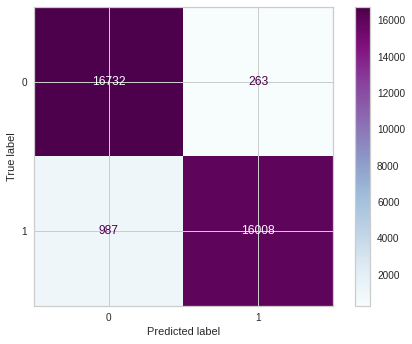

In [82]:
df_final = df[["V14","V4","V3","V16","V17","V12"]]
df_final["Class"] = df.Class
X = df_final.drop(columns="Class")
y = df_final.Class

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RF_Model.fit(X_train, y_train)
y_pred = RF_Model.predict(X_test)

print("\033[1m---------------------Test Scores---------------------\033[0m")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

print("\033[1m---------------------Train Scores---------------------\033[0m")
y_pred_train = RF_Model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(RF_Model, X_test, y_test,cmap="BuPu");

## Save and Export the Model as .pkl

In [84]:
X = df_filter_feature.drop(columns="Class")
y = df_filter_feature.Class

In [85]:
final_scaler = StandardScaler()
final_scaler.fit(X)

StandardScaler()

In [86]:
Log_Reg.fit(X,y)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='sag')

In [87]:
RF_Model.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=4,
                       min_samples_split=8, n_estimators=50, random_state=42)

In [88]:
import pickle
pickle.dump(Log_Reg, open("Log_Reg.pkl", "wb"))
pickle.dump(RF_Model, open("RF_Model.pkl", "wb"))
pickle.dump(final_scaler, open('scaler.pkl', 'wb'))

## PREDICTION

In [90]:
df_final[df_final.Class == 1][["V14","V4","V3","V16","V17","V12"]].reset_index(drop = True).head()

,V14,V4,V3,V16,V17,V12
0,-4.289254,3.997906,-1.609851,-1.140747,-2.830056,-2.899907
1,-1.692029,2.288644,1.088463,0.666780,0.599717,-0.503141
2,-1.470102,2.330243,-0.359745,-2.282194,-4.781831,-6.560124
3,-6.771097,2.679787,-2.592844,-7.358083,-12.598419,-10.912819
4,-6.079337,4.732795,-4.304597,2.581851,6.739384,-4.609628


In [91]:
my_dict = df_final[df_final.Class == 1][["V14","V4","V3","V16","V17","V12"]].reset_index(drop = True).sample(1)
my_dict

,V14,V4,V3,V16,V17,V12
21,-9.405423,4.328199,-3.114372,-7.552342,-9.802562,-10.833164


In [92]:
result1 = Log_Reg.predict(my_dict)
result1

array([1])

In [93]:
result2 = RF_Model.predict(my_dict)
result2

array([1])

In [96]:
my_dict2 = df_final[df_final.Class == 0][["V14","V4","V3","V16","V17","V12"]].reset_index(drop = True).sample(1)
my_dict2

,V14,V4,V3,V16,V17,V12
200616,1.455336,0.544055,-2.442772,-0.704461,0.102585,-1.496859


In [97]:
result3 = Log_Reg.predict(my_dict2)
result3

array([0])

In [100]:
result4 = RF_Model.predict(my_dict2)
result4

array([1])

### Neural Network

In the final step, we will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

***i. Import Libraries***

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

***ii. Define Model***

In [102]:
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 24)                504       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,673
Trainable params: 1,673
Non-trainabl

***iii. Compile Model***

In [103]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

***iv. Fit Model***

In [104]:
model.fit(x = X_train, y = y_train, batch_size = 30, epochs = 10)

Epoch 1/10
2644/2644 [==============================] - 11s 3ms/step - loss: 0.1880 - accuracy: 0.9288
Epoch 2/10
2644/2644 [==============================] - 9s 3ms/step - loss: 0.1560 - accuracy: 0.9389
Epoch 3/10
2644/2644 [==============================] - 5s 2ms/step - loss: 0.1478 - accuracy: 0.9413
Epoch 4/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1409 - accuracy: 0.9444
Epoch 5/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1373 - accuracy: 0.9459
Epoch 6/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1326 - accuracy: 0.9470
Epoch 7/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1295 - accuracy: 0.9486
Epoch 8/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1279 - accuracy: 0.9477
Epoch 9/10
2644/2644 [==============================] - 6s 2ms/step - loss: 0.1257 - accuracy: 0.9481
Epoch 10/10
2644/2644 [==============================] - 7s 3ms/step - loss: 0.12

***v. Prediction and Model Evaluating***

In [105]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred.round()))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred.round()))

[[16410   585]
 [  979 16016]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16995
           1       0.96      0.94      0.95     16995

    accuracy                           0.95     33990
   macro avg       0.95      0.95      0.95     33990
weighted avg       0.95      0.95      0.95     33990



In [106]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose = 1,callbacks = [early_stop])

Epoch 1/500
2231/2231 [==============================] - 6s 2ms/step - loss: 0.1791 - accuracy: 0.9300 - val_loss: 0.1569 - val_accuracy: 0.9378
Epoch 2/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1516 - accuracy: 0.9414 - val_loss: 0.1495 - val_accuracy: 0.9404
Epoch 3/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1446 - accuracy: 0.9435 - val_loss: 0.1429 - val_accuracy: 0.9419
Epoch 4/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1390 - accuracy: 0.9447 - val_loss: 0.1388 - val_accuracy: 0.9435
Epoch 5/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1340 - accuracy: 0.9461 - val_loss: 0.1339 - val_accuracy: 0.9458
Epoch 6/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1290 - accuracy: 0.9479 - val_loss: 0.1319 - val_accuracy: 0.9457
Epoch 7/500
2231/2231 [==============================] - 5s 2ms/step - loss: 0.1250 - accuracy: 0.9502 - val_loss: 0.1268 - val_ac

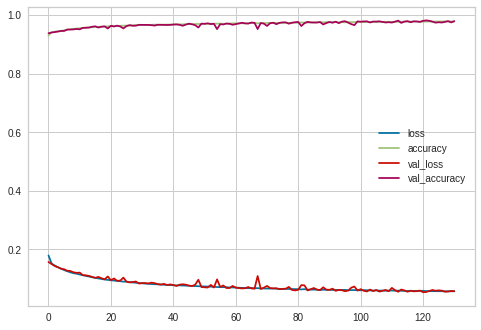

In [107]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [109]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_train = (model.predict(X_train) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print("---------------------Test Scores---------------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("---------------------Train Scores---------------------")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

---------------------Test Scores---------------------
[[16517   478]
 [  258 16737]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16995
           1       0.97      0.98      0.98     16995

    accuracy                           0.98     33990
   macro avg       0.98      0.98      0.98     33990
weighted avg       0.98      0.98      0.98     33990

---------------------Train Scores---------------------
[[38676   979]
 [  536 39119]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     39655
           1       0.98      0.99      0.98     39655

    accuracy                           0.98     79310
   macro avg       0.98      0.98      0.98     79310
weighted avg       0.98      0.98      0.98     79310



In [110]:
model.save('model_DP_NN.h5')

***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

A proper IDE and creating web app with Streamlit API is one of the methods.